In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


# Q1) Who will win the match?

    1) KKR
    2) CSK

In [3]:
# get all matches between csk vs kkr
kkr_csk = matches[((matches.team1=='Kolkata Knight Riders')&(matches.team2=='Chennai Super Kings'))|((matches.team2=='Kolkata Knight Riders')&(matches.team1=='Chennai Super Kings'))]

print(f"Total number of matches between csk vs kkr : {kkr_csk.shape[0]}")

Total number of matches between csk vs kkr : 20


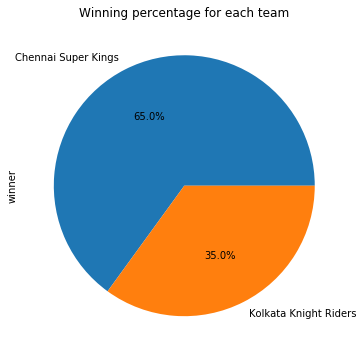

In [4]:
# calculating total wins by each team
kkr_csk.winner.value_counts().plot("pie", autopct = "%1.1f%%", figsize=(20,6))
plt.title("Winning percentage for each team")
plt.show()

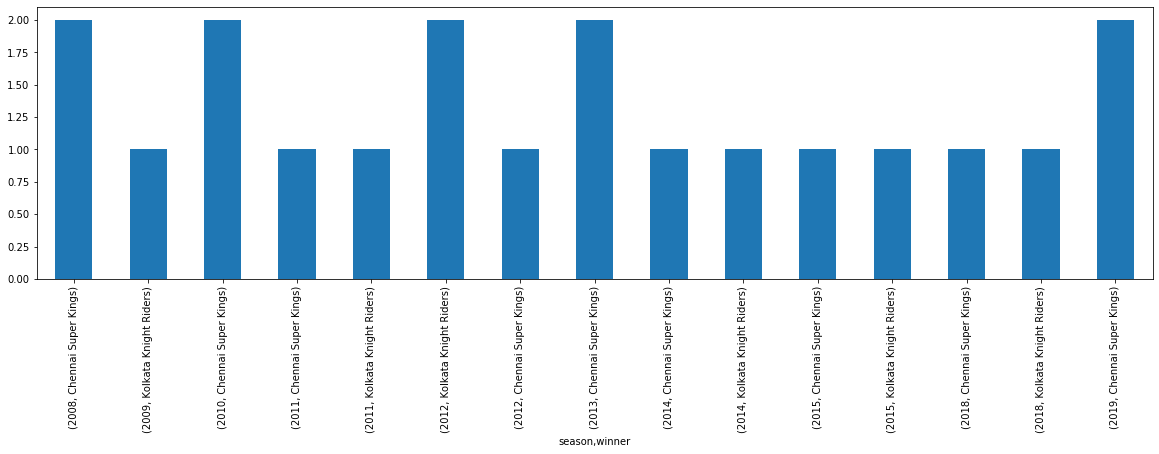

In [5]:
#checking winning percent per season
df_kkr_csk = pd.DataFrame(kkr_csk.groupby('season')['winner'].value_counts())
df_kkr_csk['winner'].plot(kind='bar', figsize=(20,5))

**Inference:**
    - From the historic data by calculating number of wins by each team when playing against each other, CSK has a higher probability to win. however if we consider CSK performance for season 2020 they dont seem to be in a good form whereas KKR is killing it this season. So probably KKR will win however CSK just to stay in the game might try really hard to get this win.

# Q2) How many balls more/less will KKR take to reach a team total of 75 as compared to CSK

    1) 0-7
    2) 8-15
    3) 16-20
    4) 21 or more

In [6]:
#getting all rows when KKR and CSK play with each other
kkr_csk_all = deliveries[((deliveries.batting_team=='Chennai Super Kings')&(deliveries.bowling_team=='Kolkata Knight Riders'))|((deliveries.bowling_team=='Chennai Super Kings')&(deliveries.batting_team=='Kolkata Knight Riders'))]
kkr_csk_all.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
16468,71,1,Kolkata Knight Riders,Chennai Super Kings,1,1,SC Ganguly,BB McCullum,JDP Oram,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
16469,71,1,Kolkata Knight Riders,Chennai Super Kings,1,2,SC Ganguly,BB McCullum,JDP Oram,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
16470,71,1,Kolkata Knight Riders,Chennai Super Kings,1,3,BB McCullum,SC Ganguly,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
16471,71,1,Kolkata Knight Riders,Chennai Super Kings,1,4,BB McCullum,SC Ganguly,JDP Oram,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
16472,71,1,Kolkata Knight Riders,Chennai Super Kings,1,5,SC Ganguly,BB McCullum,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [13]:
def count_balls_toscore(df, score):
    """
    takes dataframe and scores needed by user abd returns array of balls taken to reach score every match
    """
    
    #counting total runs scored per ball
    df['total_runs_cumsum'] = df.groupby('match_id')['total_runs'].cumsum().values
    
    balls_taken = []
    

    #counting balls taken to score 50 runs by SRH team
    for m in df['match_id'].unique():
        df1 = df[df.match_id==m]

        if df1.total_runs_cumsum.isin(range(score,score+5)).any():
            df2 = df1[df1.total_runs_cumsum<=score]
            balls_taken.append(df2.shape[0])
            
        else:
            balls_taken.append(0)
            
    result = pd.DataFrame({'match_id' : df['match_id'].unique().tolist(), 
                          'balls_taken': balls_taken})
            
    return result
    

In [19]:
#getting all rows when KKR batting and CSK bowling
kkrb_cskf = kkr_csk_all[(kkr_csk_all.batting_team=='Kolkata Knight Riders')&(kkr_csk_all.bowling_team=='Chennai Super Kings')]

#counting bowls taken by KKR to reach 75 runs
kkrb_balls_taken = count_balls_toscore(kkrb_cskf, 75)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
#getting all rows when csk batting and kkr bowling
cskb_kkrf = kkr_csk_all[(kkr_csk_all.batting_team=='Chennai Super Kings')&(kkr_csk_all.bowling_team=='Kolkata Knight Riders')]

#counting bowls taken by csk to reach 75 runs
cskb_balls_taken = count_balls_toscore(cskb_kkrf, 75)
# cskb_balls_taken

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [21]:
#merging two tables for easier calculations
balls_taken = kkrb_balls_taken.merge(cskb_balls_taken, on='match_id', suffixes=['_kkr', '_csk'])

balls_taken['difference'] = np.abs(balls_taken.balls_taken_kkr - balls_taken.balls_taken_csk)
balls_taken

,match_id,balls_taken_kkr,balls_taken_csk,difference
0,71,70,62,8
1,103,70,0,70
2,166,54,54,0
3,182,72,77,5
4,222,77,44,33
5,235,61,58,3
6,281,0,89,89
7,347,77,67,10
8,368,51,49,2
9,381,50,54,4


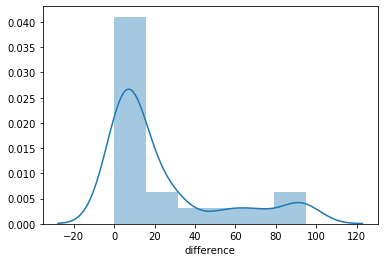

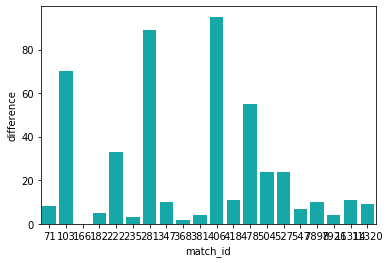

In [22]:

sns.distplot(balls_taken['difference'])
plt.show()

# 
sns.barplot(x=balls_taken['match_id'],y=balls_taken['difference'], color='c')
plt.show()

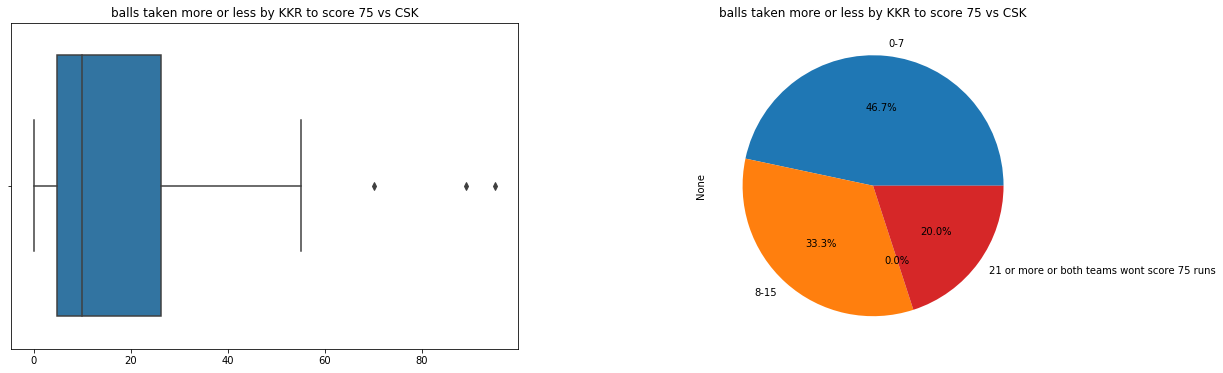

In [24]:
#checking as per options visually
fig, ax= plt.subplots(1,2, figsize=(20,6))

ax[0].set_title('balls taken more or less by KKR to score 75 vs CSK')
sns.boxplot(balls_taken.difference.values, ax=ax[0])

pd.cut(balls_taken.difference.values, bins=[0,8, 16, 21, 50], labels=['0-7', '8-15', '16-20', '21 or more or both teams wont score 75 runs']).value_counts().plot("pie", autopct='%1.1f%%', title='balls taken more or less by KKR to score 75 vs CSK', ax=ax[1]);

**Inference:**
    - If we calculate cumulative sum of total runs per ball and count balls taken to reach 75 per match then take a difference for matches between CSK and KKR, the highest probablity indicates 0-7 balls and tnext is of 8-15 balls, if we calculate mean again it says aroung 8 balls so we can safely go with option 8-15

# Q3) How many balls will Deepak Chahar take to get his first wicket?
    
    1) 0-7
    2) 8-15
    3) 16-24
    4) He wont get a wicket

In [26]:
# kkr_csk_all.bowler.unique()

In [40]:
def ball_first_wicket(df, bowler_name):
    """Takes bowlers name and both teams dataframe and returns ball at which player took his first wicket for every match if no wicket returns 0"""
    
    bowler_all = df[df.bowler==bowler_name]
    
    first_wickets = []
    
    for m in bowler_all.match_id.unique():
        df1 = bowler_all[bowler_all.match_id==m]
        wickets=np.argwhere(df1['player_dismissed'].notnull())
        if len(wickets)>0:
            first_wickets.append(wickets[0][0])
        else:
            first_wickets.append(np.nan)
        
    result=pd.DataFrame({'match_id' : bowler_all.match_id.unique().tolist(),
                        'first_wickets' : first_wickets})
    return result
    

In [43]:
#getting ball where 'DL Chahar' got his first wicket in KRR vs CSK match
dc_first_wickets = ball_first_wicket(kkr_csk_all, 'DL Chahar')
dc_first_wickets

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


,match_id,first_wickets
0,7898,NaN
1,11314,5.0
2,11320,NaN


In [44]:
dc_first_wickets.first_wickets.describe()

count    1.0
mean     5.0
std      NaN
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: first_wickets, dtype: float64

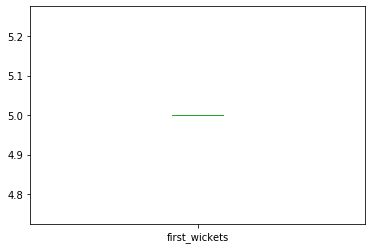

In [45]:
dc_first_wickets.first_wickets.plot(kind='box')

**Inference:**
    - We dont have enough historic data to calculate statistics however Chahar will either not get his wicket or will get it in 0-7 balls.

# Q4) How many such overs will be there in a match where 6 and 4 are scored in same over
    
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


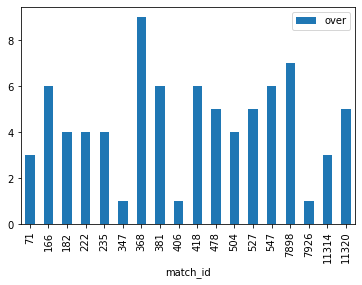

In [57]:
#first lets get rows for matches between CSK and kkr
csk_kkr_all = deliveries[((deliveries.batting_team=='Chennai Super Kings')&(deliveries.bowling_team=='Kolkata Knight Riders'))|((deliveries.batting_team=='Kolkata Knight Riders')&(deliveries.bowling_team=='Chennai Super Kings'))]


df=csk_kkr_all[['match_id', 'batting_team','over' , 'batsman_runs']]

df['run_is_4'] = csk_kkr_all['batsman_runs'].agg(lambda x: x==4)
df['run_is_6'] = csk_kkr_all['batsman_runs'].agg(lambda x: x==6)

df1 = df.groupby(['match_id', 'batting_team', 'over'])['run_is_4', 'run_is_6'].sum().reset_index()

#getting only rows  when atleast 1 4 and 1 6 is hit
df2 = df1[(df1.run_is_4>=1)&(df1.run_is_6>=1)]

#coutning overs per match where both 4 and 6 is hit
df3 = df2.groupby('match_id')['over'].count().reset_index()

df3.plot(kind='bar', x='match_id', y='over')

count    18.000000
mean      4.444444
std       2.148111
min       1.000000
25%       3.250000
50%       4.500000
75%       6.000000
max       9.000000
Name: over, dtype: float64


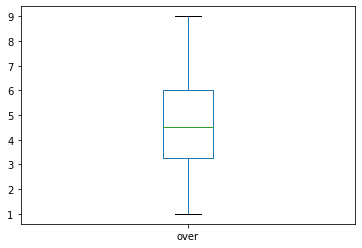

In [58]:
print(df3.over.describe())
df3['over'].plot(kind='box')

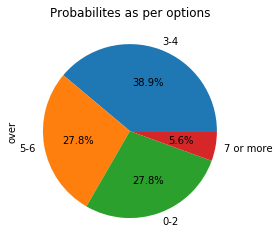

In [59]:
#checking as peroptions
df_options = pd.cut(df3.over, bins=[0,3,5,7,12], labels=['0-2', '3-4', '5-6', '7 or more']).value_counts()
df_options.plot("pie", autopct='%1.1f%%', title="Probabilites as per options")
plt.show()

In [ ]:
**Inference:**
    We can see total overs where both 6 and 4 was scored at least onve and calculate median and probablities of such overs per match highest probability indicated 3-4 

# 5. How many no-balls will be bowled in the match?
    - 0-1
    - 2-3
    - 4-5
    - 6 or more

In [53]:
#lets also check the matches played between kkr and csk
nb_csk_kkr = noballs_bowls[((noballs_bowls.batting_team=='Kolkata Knight Riders')&(noballs_bowls.bowling_team=='Chennai Super Kings'))|((noballs_bowls.batting_team=='Chennai Super Kings')&(noballs_bowls.bowling_team=='Kolkata Knight Riders'))]

nb_csk_kkr.groupby('match_id')['ball'].count()

match_id
71       3
103      1
166      1
347      1
381      3
418      1
478      2
504      1
7898     1
11314    2
Name: ball, dtype: int64

In [54]:
nb_cskkkr = nb_csk_kkr.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (csk and kkr) match: {np.mean(nb_cskkkr)}')
print(f'Median  wide bowls in (csk and kkr) match: {np.median(nb_cskkkr)}')
print(f'Minimum  wide bowls in (csk and kkr) match: {np.min(nb_cskkkr)}')
print(f'Maximum  wide bowls in (csk and kkr) match: {np.max(nb_cskkkr)}')

Average wide bowls in (csk and kkr) match: 1.6
Median  wide bowls in (csk and kkr) match: 1.0
Minimum  wide bowls in (csk and kkr) match: 1
Maximum  wide bowls in (csk and kkr) match: 3


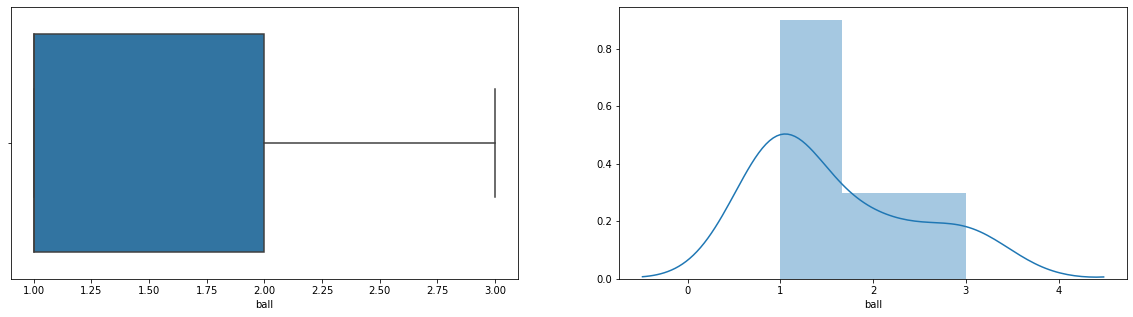

In [55]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_cskkkr, ax = ax[0])
sns.distplot(nb_cskkkr, ax=ax[1])

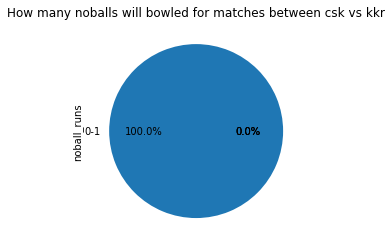

In [56]:
# get bins for getting probabilites as per per options 
csk_kkr_noball = pd.cut(nb_csk_kkr['noball_runs'], bins=[0,2,4,6,20], labels=['0-1', '2-3', '3-5', '6 or more'])
csk_kkr_noball.value_counts().plot("pie", autopct='%1.1f%%')
plt.title("How many noballs will bowled for matches between csk vs kkr")
plt.show()

**Inference:**
    Well we can see CSK vs KKR when playing with each other hardly have any noballs but in a very less number they dao which is only 1 noball.